#Intended Learning Outcome
1. Perform descriptive and correlation analysis to to analyze the dataset.
2. Interpret the results of descriptive and correlation analysis

#Resources
- Personal Computer
- Jupyter Notebook
- Internet Connection

#Instruction

1. Gather a dataset regarding your identified problem for the ASEAN Data Science Explorer. Make sure that the dataset includes multiple variables.
2. Load the dataset into pandas dataframe.
3. Prepare the data by applying appropriate data preprocessing techniques.
4. Analyze the data using descriptive analysis.
4. Perform correlation analysis.
5. Interpret the results based on the descriptive and correlation analysis.
6. Submit the PDF file.

In [29]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/data/NUTRITION.csv')
print("Shape:\n", df.shape)
print("\n\nColumns\n:", df.columns)
print("\n\nFirst 5 rows:\n", df.head())

df.fillna(df.mean(), inplace=True)
print("\n\nMissing values:\n", df.isnull().sum())

Shape:
 (37977, 83)


Columns
: Index(['REF_AREA', 'Geographic area', 'INDICATOR', 'Indicator', 'SEX', 'Sex',
       'AGE', 'Current age', 'WEALTH_QUINTILE', 'Wealth Quintile', 'RESIDENCE',
       'Residence', 'MATERNAL_EDU_LVL', 'Mother's Education Level',
       'HEAD_OF_HOUSE', 'Head of House', 'REPORTING_LVL', 'Reporting level',
       'INDICATOR_METADATA', 'UNIT_MULTIPLIER', 'Unit multiplier',
       'UNIT_MEASURE', 'Unit of measure', 'SOURCE_LINK', 'SERIES_FOOTNOTE',
       'CUSTODIAN', 'PUBLICATION_DATE', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2000-05-31', '2000-12-31', '2001', '2002',
       '2003', '2004', '2005', '2005-12-07', '2005-12-31', '2006', '2007',
       '2008', '2008-03-31', '2008-11-18', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '201

<ipython-input-29-a8b94925da89>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [30]:
print("Description:\n", df.describe())

Description:
        UNIT_MULTIPLIER  PUBLICATION_DATE          1975          1976  \
count     37977.000000               0.0  37977.000000  37977.000000   
mean          0.001581               NaN      6.785000      6.790000   
std           0.068828               NaN      0.249249      0.247551   
min           0.000000               NaN      0.300000      0.300000   
25%           0.000000               NaN      6.785000      6.790000   
50%           0.000000               NaN      6.785000      6.790000   
75%           0.000000               NaN      6.785000      6.790000   
max           3.000000               NaN     21.200000     21.200000   

               1977          1978          1979          1980         1981  \
count  37977.000000  37977.000000  37977.000000  37977.000000  37977.00000   
mean       6.801667      6.818333      6.833333      6.861667      6.89500   
std        0.246141      0.244020      0.242239      0.240638      0.23897   
min        0.300000      

In [31]:
start = df.columns.get_loc('1975')
end = df.columns.get_loc('2016')

df = pd.concat([df.iloc[:, :start], df.iloc[:, end:]], axis=1)
print(df.head())
print(df.columns)

  REF_AREA    Geographic area       INDICATOR           Indicator SEX     Sex  \
0      BRN  Brunei Darussalam  NT_ANT_BAZ_NE2  BMI-for-age <-2 SD   F  Female   
1      BRN  Brunei Darussalam  NT_ANT_BAZ_NE3  BMI-for-age <-3 SD   F  Female   
2      BRN  Brunei Darussalam  NT_ANT_BAZ_PO2  BMI-for-age >+2 SD   F  Female   
3      BRN  Brunei Darussalam  NT_ANT_BAZ_PO2  BMI-for-age >+2 SD   F  Female   
4      BRN  Brunei Darussalam  NT_ANT_BAZ_PO2  BMI-for-age >+2 SD   F  Female   

      AGE          Current age WEALTH_QUINTILE Wealth Quintile  ...  \
0    Y0T4    Under 5 years old              _T           Total  ...   
1    Y0T4    Under 5 years old              _T           Total  ...   
2    M0T5   Under 6 months old              _T           Total  ...   
3  M12T23  12 to 23 months old              _T           Total  ...   
4  M24T35  24 to 35 months old              _T           Total  ...   

  PUBLICATION_DATE       2016       2017      2018       2019        2020  \
0        

In [32]:
df['Geographic area'].unique()

array(['Brunei Darussalam', 'Indonesia', 'Cambodia',
       "Lao People's Democratic Republic", 'Myanmar', 'Malaysia',
       'Philippines', 'Singapore', 'Thailand', 'Viet Nam'], dtype=object)

In [33]:
corr_matrix = df.corr()

<ipython-input-33-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


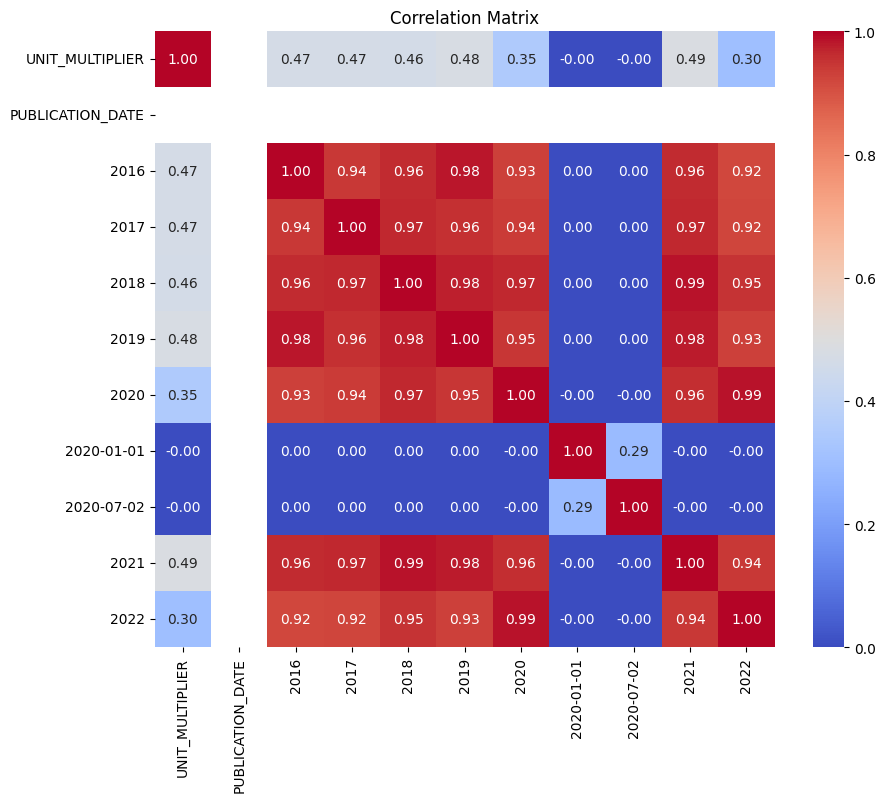

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()